## The Titanic dataset is a classic dataset used in data analysis and machine learning. It comprises various columns, including:

1. **PassengerID**: A unique identifier for each passenger.
2. **Survived**: A binary variable indicating whether the passenger survived (1) or did not survive (0).
3. **Pclass**: The passenger's ticket class (1st, 2nd, or 3rd).
4. **Name**: The passenger's name.
5. **Sex**: The passenger's gender (male or female).
6. **Age**: The passenger's age.
7. **SibSp**: The number of siblings or spouses aboard.
8. **Parch**: The number of parents or children aboard.
9. **Ticket**: The passenger's ticket number.
10. **Fare**: The fare paid for the ticket.
11. **Cabin**: The cabin number where the passenger stayed.
12. **Embarked**: The port at which the passenger boarded (C = Cherbourg, Q = Queenstown, S = Southampton).

Analysts and data scientists often use this dataset to explore relationships between these variables and to predict survival outcomes based on passenger information.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/kaggle/input/titanic-dataset/Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [4]:
y = df.Survived
X = df.drop('Survived',axis='columns')
X.head()

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


In [5]:
dummies = pd.get_dummies(X.Sex).astype(int)
dummies.head(3)

,female,male
0,0,1
1,1,0
2,1,0


In [6]:
X = pd.concat([X,dummies],axis='columns')
X.head()

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0
3,1,female,35.0,53.1000,1,0
4,3,male,35.0,8.0500,0,1


In [7]:
X.drop(['Sex'],axis=1,inplace=True)

In [8]:
X

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1
...,...,...,...,...,...
886,2,27.0,13.0000,0,1
887,1,19.0,30.0000,1,0
888,3,NaN,23.4500,1,0
889,1,26.0,30.0000,0,1


In [9]:
X.isnull().sum()

Pclass      0
Age       177
Fare        0
female      0
male        0
dtype: int64

In [10]:
X.Age = X.Age.fillna(X.Age.mean())
X.head()

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1


In [11]:
X.isnull().sum()

Pclass    0
Age       0
Fare      0
female    0
male      0
dtype: int64

In [12]:
type(X)

pandas.core.frame.DataFrame

In [13]:
X.describe()

,Pclass,Age,Fare,female,male
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,32.204208,0.352413,0.647587
std,0.836071,13.002015,49.693429,0.477990,0.477990
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,7.910400,0.000000,0.000000
50%,3.000000,29.699118,14.454200,0.000000,1.000000
75%,3.000000,35.000000,31.000000,1.000000,1.000000
max,3.000000,80.000000,512.329200,1.000000,1.000000


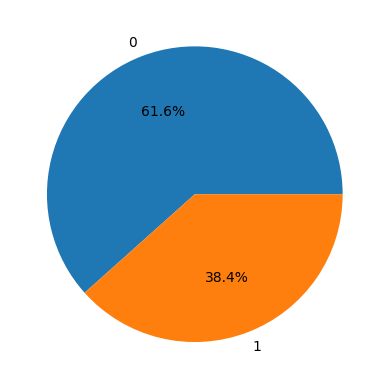

In [14]:
plt.pie(y.value_counts(),labels=[0,1],autopct='%1.1f%%')
plt.show()

In [15]:
y.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [17]:
print("Length of X_train - ",len(X_train))
print("Length of X_test - ",len(X_test))

Length of X_train -  623
Length of X_test -  268


In [18]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [19]:
pd.DataFrame(y_test,model.predict(X_test),columns=['Actual','Predicted'])

,Actual,Predicted
0,NaN,NaN
0,NaN,NaN
0,NaN,NaN
1,NaN,NaN
1,NaN,NaN
...,...,...
0,NaN,NaN
0,NaN,NaN
0,NaN,NaN
0,NaN,NaN


In [20]:
model.score(X_test,y_test)

0.7873134328358209

In [21]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
y_pred = model.predict(X_test)
print("Accuracy Score - ",accuracy_score(y_test,y_pred)*100)
print("F1 Socre - ",f1_score(y_test,y_pred)*100)
print("Confusion_matrix : \n",confusion_matrix(y_test,y_pred))

Accuracy Score -  78.73134328358209
F1 Socre -  74.2081447963801
Confusion_matrix : 
 [[129  28]
 [ 29  82]]
